## Task 9.2.1: Optimizer Comparison

* Set up a fully connected neural network model using `PyTorch`. It should be designed for classifying CIFAR10 images. The model should have the following layers: **(RESULT)**
    * Layer1: input_dimension --> 256
    * Layer2: 256 --> 128
    * Layer3: 128 --> 10
    * Use ReLU as your non-linear activation function
* Monitor the learning (loss-function) for different optimizers. Feel free to use `PyTorch`'s implementations for each: **(RESULT)**
    * SGD (with learning rates [0.1, 0.01, 0.001])
    * SGD (with learning rates [0.1, 0.01, 0.001] and 0.9 momentum)
    * Adam
    * AdamW
    * RMSprop

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


# Simple Fully Connected Model
class SimpleFC(nn.Module):
    def __init__(self, input_dimension):
        super(SimpleFC, self).__init__()
        self.net= nn.Sequential(nn.Linear(input_dimension, 256), nn.ReLU(), nn.Linear(256, 128),nn.ReLU(), nn.Linear(128, 10))


    def forward(self,x):
        return self.net(x)


def get_optimizer(optimiser_name, model, lr, momentum=0):
    if optimiser_name == 'SGD':
        optimiser= optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    elif optimiser_name == 'Adam':
        optimiser= optim.Adam(model.parameters(), lr=lr)
    elif optimiser_name == 'AdamW':
        optimiser= optim.AdamW(model.parameters(), lr=lr)
    elif optimiser_name == 'RMSprop':
        optimiser= optim.RMSprop(model.parameters(), lr=lr)
    return optimiser



def load_data(batch_size=32):   # Set batch size according to your machine
    """Load CIFAR-10 dataset."""
    transform = transforms.Compose([
      transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5 ))])


    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)
    return trainloader, testloader



def train(model, optimizer, criterion, trainloader, epochs, device, lr, momentum):
  if momentum >0:
   print( "Optimiser Name: ", optimizer.__class__.__name__, "Learning rate: ", lr, "Momentum: ", momentum, "\n")
  else:
    print("Optimiser Name: ", optimizer.__class__.__name__, "Learning rate: ", lr, "\n")
  model.train()
  losses=[]
  for i in range(epochs):
    totalloss=0
    for batch_x, batch_y in trainloader:
      batch_x = batch_x.view(batch_x.shape[0], -1).to(device)
      batch_y = batch_y.to(device)
      optimizer.zero_grad()
      output = model(batch_x)
      loss = criterion(output, batch_y)
      totalloss+=loss.item()
      loss.backward()
      optimizer.step()
    losses.append(totalloss/len(trainloader))
    print ("Epoch: ", i, "Average Loss: ", totalloss/len(trainloader))
  return losses





def test(model, testloader, device):
    """Evaluate on test set."""
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
      for batch_X, batch_y in testloader:
        batch_X = batch_X.view(batch_X.shape[0], -1).to(device)
        preds = model(batch_X)
        _, predicted = torch.max(preds, 1)
        correct += (predicted == batch_y).sum().item()
        total += batch_y.size(0)
    return correct / total





In [2]:
# Setup - use CPU for simplicity
#cross entropy
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}\n")



trainloader, testloader = load_data(batch_size=32)
criterion = nn.CrossEntropyLoss()
optimisers = [

    {"name": "SGD", "lr": 0.1, "momentum": 0},
    {"name": "SGD", "lr": 0.01, "momentum": 0},
    {"name": "SGD", "lr": 0.001, "momentum": 0},

    {"name": "SGD", "lr": 0.1, "momentum": 0.9},
    {"name": "SGD", "lr": 0.01, "momentum": 0.9},
    {"name": "SGD", "lr": 0.001, "momentum": 0.9},

    {"name": "Adam", "lr": 0.001},
    {"name": "AdamW", "lr": 0.001},
    {"name": "RMSprop", "lr": 0.01}

]
for myoptim in optimisers:
    optimiser_name= myoptim["name"]
    lr= myoptim["lr"]
    if "momentum" in myoptim:
      momentum= myoptim["momentum"]
    else:
      momentum=0
    model = SimpleFC(32*32*3).to(device)
    losses= train(model, get_optimizer(optimiser_name, model,lr , momentum), criterion, trainloader,15,device, lr, momentum)
    myoptim["losses"]= losses
    if momentum>0:
      print("Accuracy with optimiser: ", myoptim["name"],"learning_rate: ", lr, "momentum: ", momentum, "is", test(model, testloader, device), "\n")
    else:
      print("Accuracy with optimiser: ", myoptim["name"],"learning_rate: ", lr, "is", test(model, testloader, device), "\n")

# TODO: Implement


Using device: cpu



100%|██████████| 170M/170M [00:01<00:00, 96.6MB/s]


Optimiser Name:  SGD Learning rate:  0.1 

Epoch:  0 Average Loss:  1.6684976937445934
Epoch:  1 Average Loss:  1.4607650842791708
Epoch:  2 Average Loss:  1.360262229476155
Epoch:  3 Average Loss:  1.2831548048911459
Epoch:  4 Average Loss:  1.2254791799372613
Epoch:  5 Average Loss:  1.1730135162518869
Epoch:  6 Average Loss:  1.12222049450615
Epoch:  7 Average Loss:  1.0839216652697503
Epoch:  8 Average Loss:  1.0348377379178237
Epoch:  9 Average Loss:  0.9942528646646672
Epoch:  10 Average Loss:  0.9552534270843328
Epoch:  11 Average Loss:  0.9192061373536128
Epoch:  12 Average Loss:  0.8941950175103208
Epoch:  13 Average Loss:  0.862111505871771
Epoch:  14 Average Loss:  0.8279018159562476
Accuracy with optimiser:  SGD learning_rate:  0.1 is 0.5191 

Optimiser Name:  SGD Learning rate:  0.01 

Epoch:  0 Average Loss:  1.9092810285144788
Epoch:  1 Average Loss:  1.6307314237721517
Epoch:  2 Average Loss:  1.5200036378983726
Epoch:  3 Average Loss:  1.4390747666511488
Epoch:  4 Aver

Adam, AdamW and RMSprp had the default learning rates used

We can see that although Adam/AdamW optimisers where the ones having the training loss decreased at a faster rate due to their adaptive nature, yet SGD with momentum 0.9 and learning rate 0.001 had the best test results meaning that it was the best at generalisation and this can be explained by the fact that the small learning rate and a 0.9 momentum balanced between stability and speed. On the other hand, RMSprop and SGD with learning rate 0.1 and 0.9 momentum failed drastically. This is because 0.01 is high learning rate for RMSprop and when it comes to SGD, this high learning rate combined with this high momentum results in overshooting. SGD with no momentum showed that as learning rate decreases, generalisation is achieved (comparing lr=0.1 and 0.01). Yet, even though generalisation will at some point be achieved, the learning becomes is considered slow with lr=0.001.

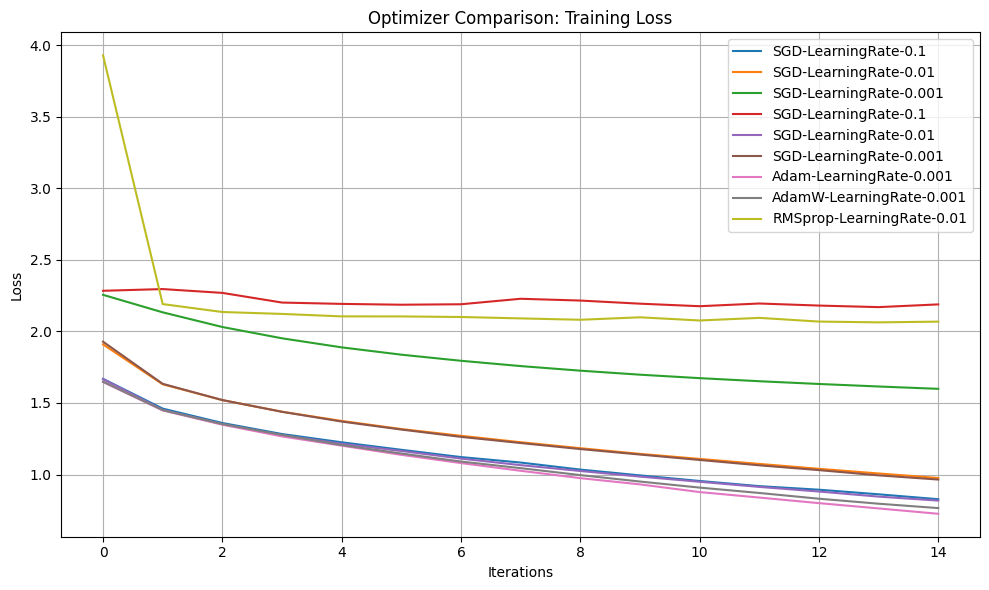

In [3]:
plt.figure(figsize=(10, 6))

for opt in optimisers:
    losses = opt["losses"]
    name = opt["name"]
    lr = opt["lr"]
    if "momentum" in myoptim:
      momentum= myoptim["momentum"]
    else:
      momentum=0

    if momentum>0:
      label = f"{name}-LearningRate-{lr}-Momentum-{momentum}"
    else:
      label = f"{name}-LearningRate-{lr}"

    plt.plot(losses, label=label)

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Optimizer Comparison: Training Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Congratz, you made it! :)